In [82]:
import networkit as nit
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import random
import copy
import math

In [83]:
def hashing(lst, m): #need to make a better hash
    return sum(lst) % m

In [139]:
def weisfeiler_lehman_kernel(graph, hops, t):
    count = [ 0 for _ in range(t)]
    mapping = {i:[1] for i in graph.iterNodes()}
    for _ in range(hops):
        new_map = dict()
        for node in graph.iterNodes():
            new_map[node] = copy.deepcopy(mapping[node])
            for neighbor in graph.iterNeighbors(node):
                new_map[node] += copy.deepcopy(mapping[neighbor])
        for i in new_map:
            temp = int(hashing(new_map[i],t))
            count[temp]+=1
            mapping[i] = [temp]
    return count

In [140]:
def visualize(graph, nodelst = [], lst = []):
    ''' visiualizes the graph
    '''
    plt.clf() #clear the sreen
    matrix = nit.algebraic.adjacencyMatrix(graph, matrixType='sparse') #make adjancency matrix of graph to convert it to a graph object of networkx
    G2 = nx.from_scipy_sparse_matrix(matrix)# converts the graph
    if not lst: #this is for just viewing graph
        nx.draw_circular(G2,with_labels=True)
    else: #this is for viewing graph with colors to see clusters
        colors = [random.uniform(0,0.1) for _ in range(0,len(lst))]
        color_lst = []
        for i in nodelst:
            for index, j in enumerate(lst):
                if i in j:
                    color_lst.append(colors[index])
        nx.draw_circular(G2,nodelist = nodelst ,with_labels=True, node_color = color_lst)
    plt.axis('equal')

In [198]:
#graph = nit.generators.ClusteredRandomGraphGenerator(5,10,0.1,0.1).generate()
grap = nit.generators.ErdosRenyiGenerator(7, 0.7, directed = False, selfLoops = False).generate()
grap1 = nit.generators.ErdosRenyiGenerator(7, 0.5, directed = False, selfLoops = False).generate()

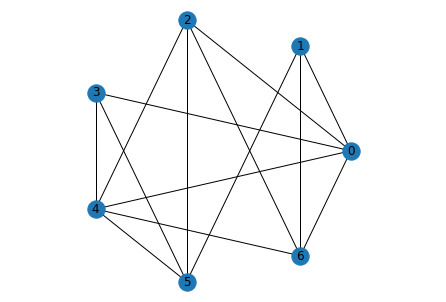

In [199]:
visualize(grap)

In [202]:
c1 = weisfeiler_lehman_kernel(grap, 20, 10)

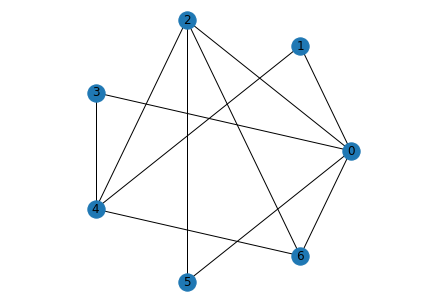

In [203]:
visualize(grap1)

In [204]:
c = weisfeiler_lehman_kernel(grap1, 20,10)

In [211]:
def similiarity(vec1, vec2):
    k = sum(map(lambda x: x[0]*x[1], zip(vec1,vec2)))
    return math.degrees(math.acos(k/(float(sum([i**2 for i in vec1])*sum([i**2 for i in vec2]))**0.5)))

In [212]:
print(similiarity(c1,c))

28.0352533508346
